# Problem Statement:
Solving this problem will help you to gain a basic understanding of the HR industry and also how analytics and data science are applied in practice in this domain.

# Understanding the Problem Statement:
In this project, you will have to put yourself in the shoes of an HR analytics expert and by leveraging the data provided, you are supposed to identify how salary is varying with respect to other considerable factors.

The dataset should be divided into test and train and you would have to use the training data to build the model and thereby apply it to test data to measure the performance and robustness of the model.

In [8]:
pip install phik

In [9]:
#importing all the libraries required
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import phik

# data acquisition

In [10]:
#iporting the dataset
df =pd.read_csv('C:\\Users\\prane\\OneDrive\\Documents\\machine learning\\capstone project\\New_data_set.csv')

# data Exploration

In [11]:
#import first five rows of dataset
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less




Feature Description

1.Gender - talks of the gender - Male or female

2.Business - if the person has a business or no

3.Age - age of the person

4.Salary - CTC of the employee

5.Dependants - number of people dependant on the person

6.Months - duration of the person employed with the company

7.Calls - if the person has authority to make calls or not

8.Type - salary settlement type

9.Billing - Subscribed to billing plans or no

10.Unit sales - unit sale made by the person

11.Total sales - total sales made by the person

12.Rating - If he has been given a rating by a superior or no

13.Bonus - amount received by a person as bonus for sales

14.Base pay - Base pay of the employee

15.Unit price - The Unit price of a sale

16.Volume - volume allotted to a person

17.Opening balance - The opening balance of an employee

18.Low - lowest balance allotted to a person.

19.Closing Balance- The closing balance of an employee

20.Education- Educational background of an employee

In [375]:
# finding the shape of dataset
df.shape

(5000, 20)

In [376]:
#this data set contains 5000 rows and 20 columns

In [377]:
#finding the column names
df.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales',
       'Months', 'Education'],
      dtype='object')

In [378]:
#finding no of values present in respective columns and  data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4984 non-null   f

In [ ]:
# from the above information we can conclude that there are missing values for some variables

In [11]:
#finding the data types
df.dtypes

Gender             object
Business            int64
Dependancies       object
Calls              object
Type               object
Billing            object
Rating             object
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales        object
Months              int64
Education          object
dtype: object

In [21]:
# this shows the data types of the columns

In [22]:
# from the above datatypes we can see that datatype for the column Total_Sales is object instead of Float64

In [23]:
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

In [24]:
#this shows no of null values present in respective columns.
# cloumns Base_pay,Opening Balance and Total_sales contains null values

In [30]:
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


In [31]:
# from the above data we can observe the mean, median, and max ,min count.

In [25]:
#no unique values in respective columns
df.nunique()

Gender               2
Business             2
Dependancies         2
Calls                2
Type                 3
Billing              2
Rating               2
Age                 65
Salary            5000
Base_pay          4883
Bonus             5000
Unit_Price        3836
Volume            4831
openingbalance    2986
closingbalance    4011
low               4014
Unit_Sales        1434
Total_Sales       4706
Months              73
Education            4
dtype: int64

In [26]:
# finding unqiue values in education  column
uniqu=df['Education'].unique()
uniqu

array(['High School or less', 'Intermediate', 'Graduation', 'PG'],
      dtype=object)

In [27]:
#finding the count of  values in a column
df['Gender'].value_counts()

Male      2528
Female    2472
Name: Gender, dtype: int64

<AxesSubplot:>

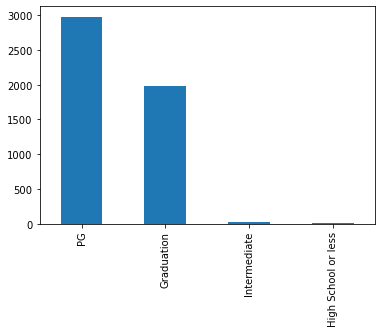

In [28]:
df.Education.value_counts().plot(kind='bar')

In [29]:
# from the above bar plot we can clearly see that employees with pg as education has higher placement and salary

In [33]:
#changing datatype of Total_Sales from Object to Float64

In [20]:
df.dtypes

Gender             object
Business            int64
Dependancies       object
Calls              object
Type               object
Billing            object
Rating             object
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales        object
Months              int64
Education          object
dtype: object

In [34]:
# as the data type of the of Total_Sales is object need to change the data type into float as contains numerical data.

In [35]:
# first we are filling the empty cells with nan
df['Total_Sales'] = df['Total_Sales'].replace(r'^\s''*$', np.nan, regex=True)

In [36]:
# now we are changing the data type of total_Sales into float
df = df.astype({"Total_Sales": float})

In [37]:
df.dtypes

Gender             object
Business            int64
Dependancies       object
Calls              object
Type               object
Billing            object
Rating             object
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales       float64
Months              int64
Education          object
dtype: object

In [25]:
#v we can see the datatype for Total_Sales has changed to float64 from object

# Handling Missing Values

<AxesSubplot:>

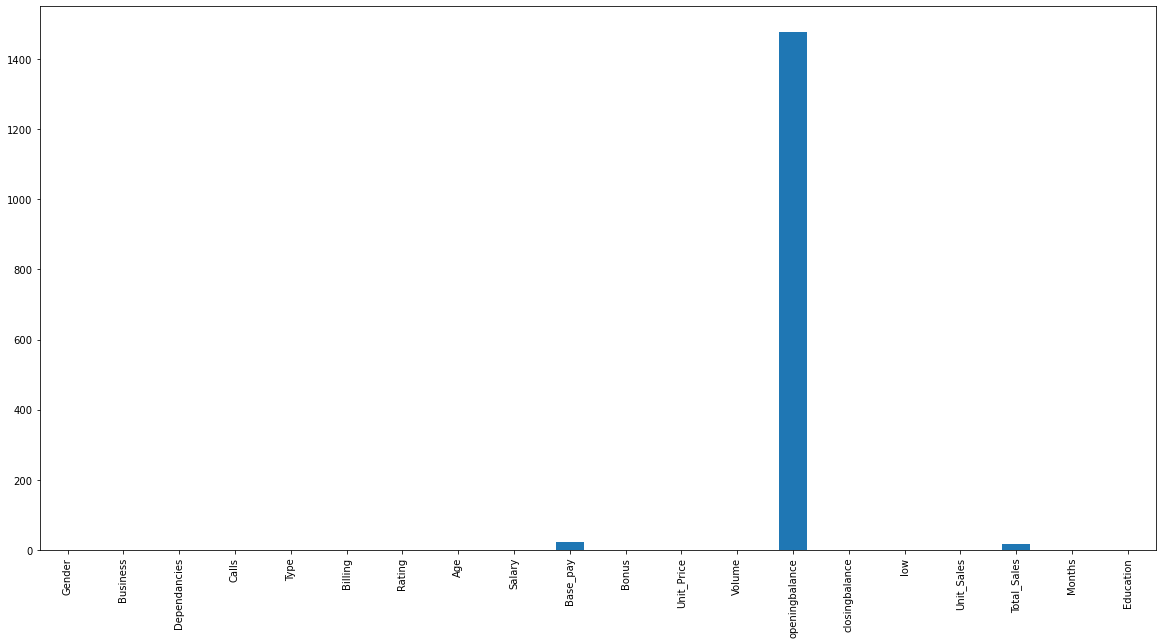

In [38]:
# plotinh the missing vlaues in bar graph
df.isnull().sum().plot(kind='bar',figsize=(20,10))

In [39]:
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

In [45]:
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [46]:
# copying the dataset to dp
dp=df.copy()

In [47]:
#creating a new column to fill the missing values in base pay column
dp['base_pay2']=dp['Salary']*40/100


In [48]:
# droping column basepay as we created new column,droping opening balc
dp1=dp.drop(columns=['Base_pay', 'openingbalance'],axis=1)

In [49]:
# replacing null values with 0 in totla Sales
dp1['Total_Sales'].fillna(0,inplace=True)


In [33]:
# all the columns in data has no null values
dp1.isnull().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Bonus             0
Unit_Price        0
Volume            0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
base_pay2         0
dtype: int64

In [36]:
dp1.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months,Education,base_pay2
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,254.4500,3.77,21226600,3.76,3.65,18.25,18.80,0,High School or less,2035.600
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,284.9060,3.74,10462800,3.68,3.65,18.40,18.85,0,High School or less,2279.248
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,294.8325,3.89,18761000,4.29,3.72,18.70,18.90,0,High School or less,2358.660
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,306.2560,4.35,66130600,4.31,3.83,18.75,19.00,0,High School or less,2450.048
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,312.2500,4.34,26868200,4.41,4.08,18.80,19.05,1,High School or less,2498.000


<AxesSubplot:>

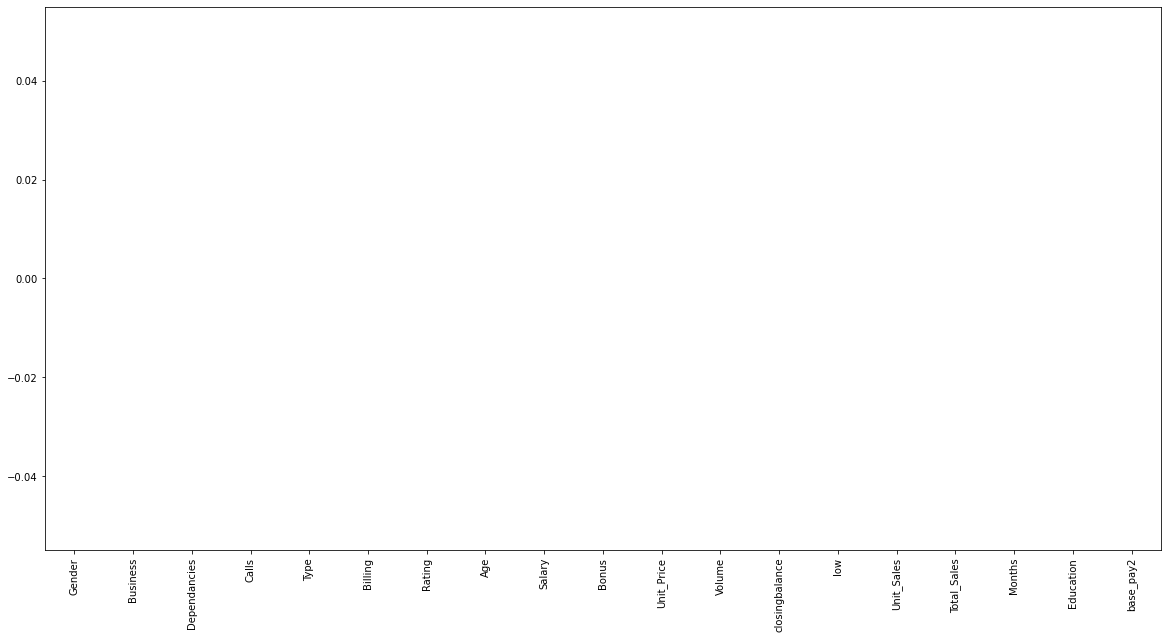

In [37]:
dp1.isnull().sum().plot(kind='bar',figsize=(20,10))

In [44]:
#above bar plot says there are no missign values
#cleaning data is done, now we have a clean data

In [39]:
 dp1.describe()

,Business,Age,Salary,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months,base_pay2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000
mean,0.160000,51.865000,99821.928553,4991.096428,51.258522,6.761260e+06,43.577828,43.034129,64.84151,2265.102380,32.18480,39928.771421
std,0.366643,8.560691,25376.961744,1268.848087,52.244022,1.620476e+07,37.148512,36.760641,30.13968,2267.720694,24.63673,10150.784698
min,0.000000,18.000000,5089.000000,254.450000,1.440000,0.000000e+00,3.680000,3.650000,18.25000,0.000000,0.00000,2035.600000
25%,0.000000,47.000000,83890.338980,4194.516950,25.727500,1.283850e+06,21.990000,21.718750,35.50000,378.262500,8.00000,33556.135592
50%,0.000000,52.000000,100579.378500,5028.968925,39.205000,2.870600e+06,33.340000,32.880001,70.50000,1389.050000,28.00000,40231.751400
75%,0.000000,57.000000,116912.092475,5845.604624,58.715000,6.247100e+06,51.117500,50.415000,89.95000,3722.337500,55.00000,46764.836990
max,1.000000,88.000000,199970.740000,9998.537000,629.511067,3.208684e+08,313.688694,312.432438,118.75000,8684.800000,72.00000,79988.296000


# Data Visualization ( for our understading)

### Correlation between numerical variables

<AxesSubplot:>

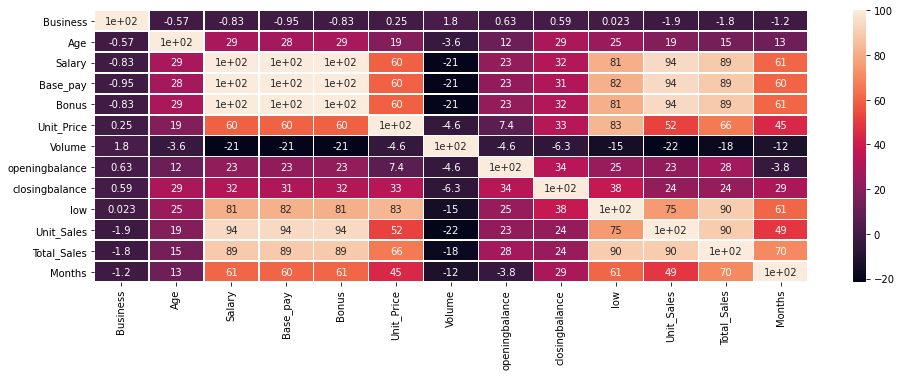

In [43]:
# finding the relation between the columns
plt.figure(figsize = (16,5))
sns.heatmap(df.corr()*100, annot = True, linewidth = 0.5)

# Univariate analysis

In [55]:
#for categorical variables we use bar plot and for numerical vairiables use box plot to analyise

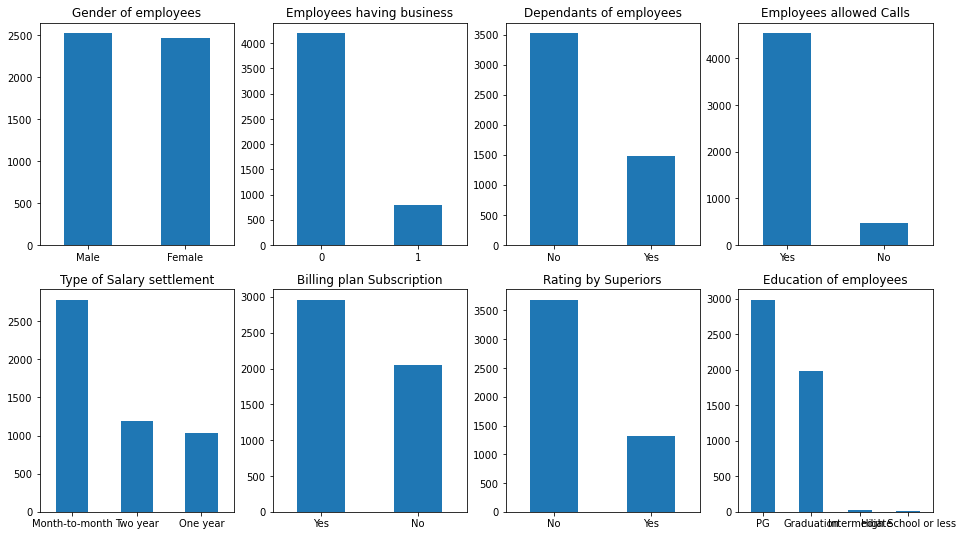

In [58]:
plt.subplot(241)

dp1['Gender'].value_counts().plot(kind='bar', title='Gender of employees', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(242)

dp1['Business'].value_counts().plot(kind='bar', title='Employees having business', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(243)

dp1['Dependancies'].value_counts().plot(kind='bar', title='Dependants of employees', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(244)

dp1['Calls'].value_counts().plot(kind='bar', title='Employees allowed Calls', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(245)

dp1['Type'].value_counts().plot(kind='bar', title='Type of Salary settlement', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(246)

dp1['Billing'].value_counts().plot(kind='bar', title='Billing plan Subscription', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(247)

dp1['Rating'].value_counts().plot(kind='bar', title='Rating by Superiors', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(248)

dp1['Education'].value_counts().plot(kind='bar', title='Education of employees', figsize=(16,9))

plt.xticks(rotation=0)
 
plt.show()

# observation from above bar graphs


1.gender doent impact salary as the number of males and number of female are almost equal

2.majority employees have no business

3.majority employees have no dependents

4.majority of the employees are allowed to make calls.

5.salary settlement is done in three types. month to month has major employees.

6.very little amount of employees have subscribled to billing plans

7..Majority of the employees have not received rating.

8.most of the employees are highly educated.

In [63]:
# for numerical variables we use box plot

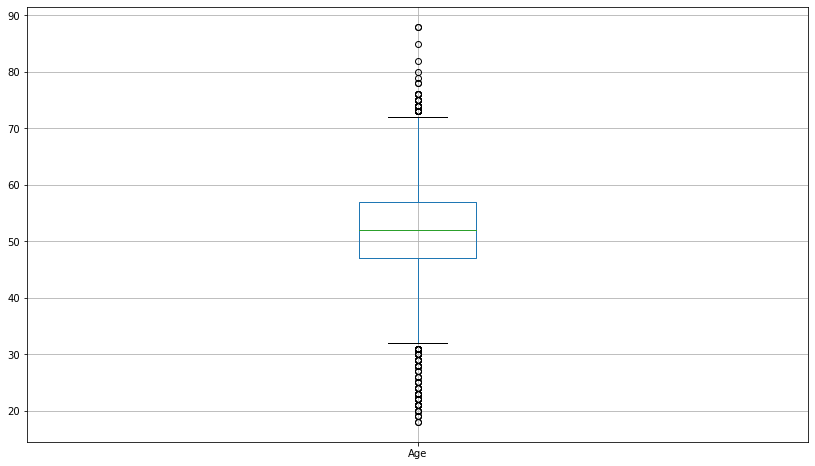

In [68]:
plt.figure(figsize=(14, 8)) 
dp1.boxplot(column =['Age'])
plt.show()

 most of the employees ranges between 47-48  to 57-58 age .
we also have lower and upper outliers


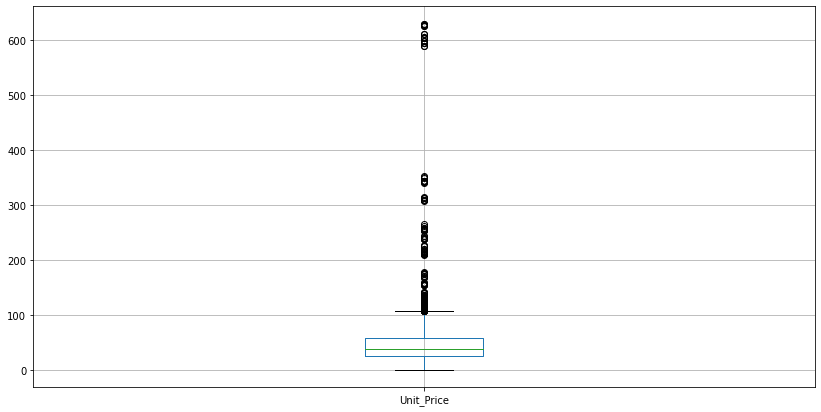

In [72]:
plt.figure(figsize=(14, 7)) 
dp1.boxplot(column =['Unit_Price'])
plt.show()

 majority of the employees  unit price range between 25 to 50. we also have  major amount of outliers.

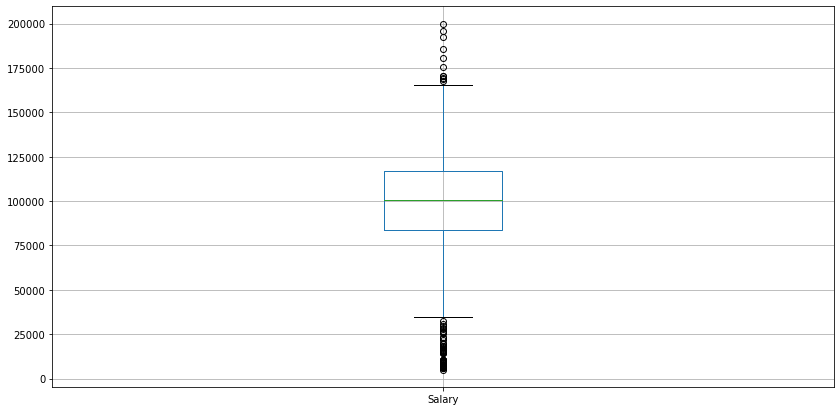

In [71]:
plt.figure(figsize=(14, 7)) 
dp1.boxplot(column =['Salary'])
plt.show()

 we can see most of the employees salaries range between 83000 to 116000, we also have lower and upper outliers.

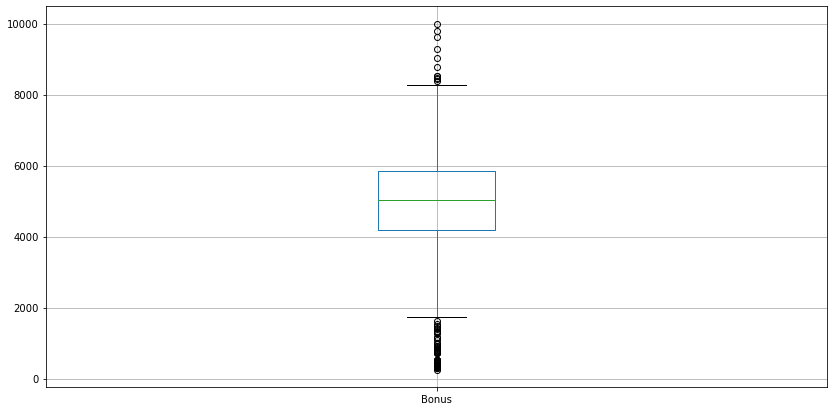

In [69]:
plt.figure(figsize=(14, 7)) 
dp1.boxplot(column =['Bonus'])
plt.show()

 most of the employees bonus range between 4100 to 5900, we also have lower and upper outliers.

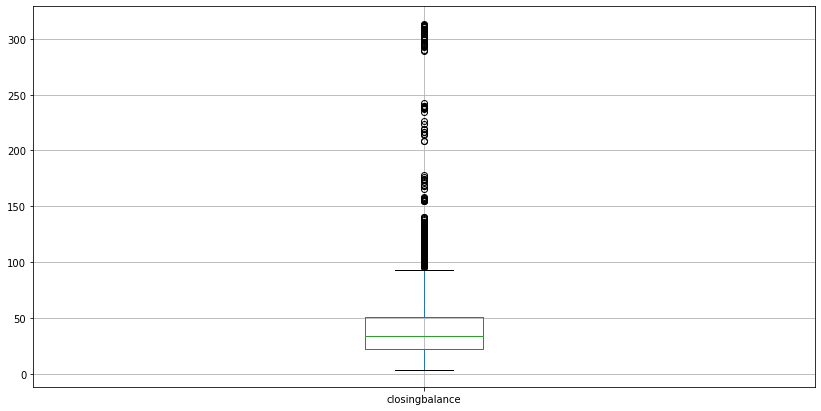

In [87]:
plt.figure(figsize=(14, 7)) 
dp1.boxplot(column =['closingbalance'])
plt.show()

 closing balance has a max range between 25 to 50. also has upper outliers.

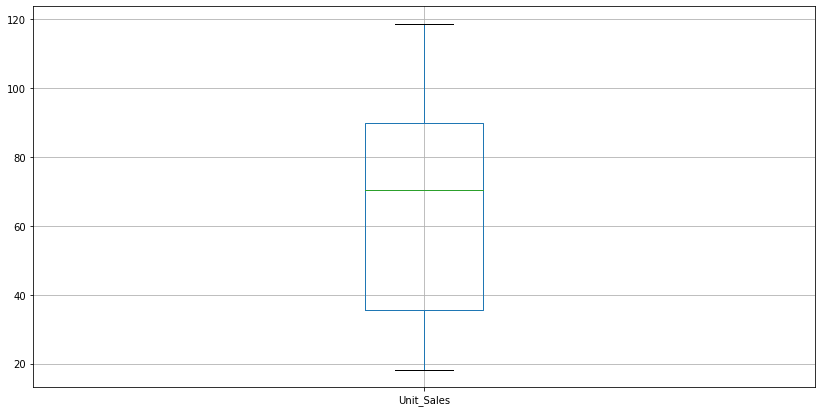

In [89]:
plt.figure(figsize=(14, 7)) 
dp1.boxplot(column =['Unit_Sales'])
plt.show()

 unit  sales have zero outliers. majority distribution is between 35 to 90

# checking whether the data is normaly distributed or not using histogram

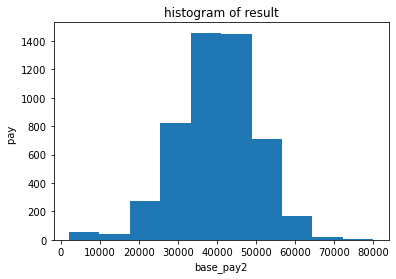

In [92]:
# histogram representation of basepay
fig,ax = plt.subplots(1,1)
a = dp1['base_pay2']
ax.hist(a)
ax.set_title("histogram of result")
ax.set_xlabel('base_pay2')
ax.set_ylabel('pay  ')
plt.show()

In [41]:
# base pay is normally distributed

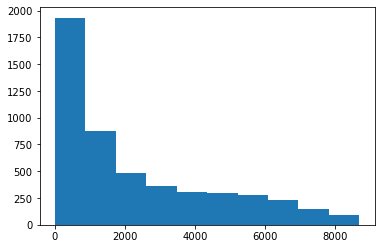

In [62]:
fig,ax = plt.subplots(1,1)
b = dp1['Total_Sales']
ax.hist(b)

plt.show()

In [93]:
# total sales is is positively inclined normally distributed

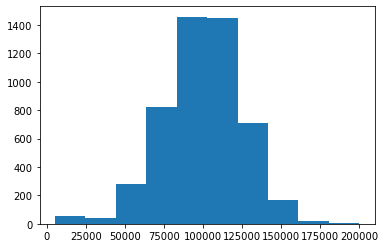

In [94]:
fig,ax = plt.subplots(1,1)
c = dp1['Salary']
ax.hist(c)
plt.show()

In [45]:
# salary is normally distributed

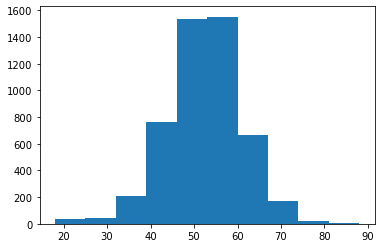

In [46]:
fig,ax = plt.subplots(1,1)
b = dp1['Age']
ax.hist(b)
plt.show()

In [47]:
#  age is again normally distributed

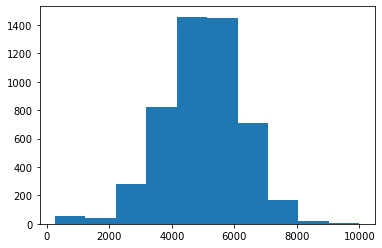

In [48]:
fig,ax = plt.subplots(1,1)
b = dp1['Bonus']
ax.hist(b)
plt.show()

In [49]:
# bonus is again normally distributed

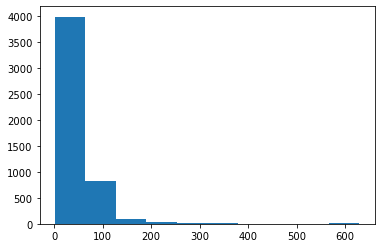

In [50]:
fig,ax = plt.subplots(1,1)
b = dp1['Unit_Price']
ax.hist(b)
plt.show()

In [95]:
# positively inclined  normal distribution

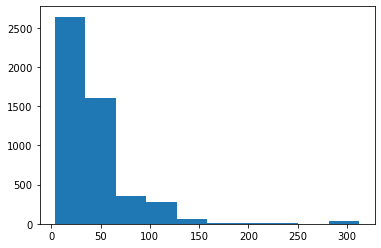

In [52]:
 fig,ax = plt.subplots(1,1)
b = dp1['low']
ax.hist(b)
plt.show()

In [96]:
# positively inclined  normal distribution

# spearmans rank correlation coefficient 

<AxesSubplot:>

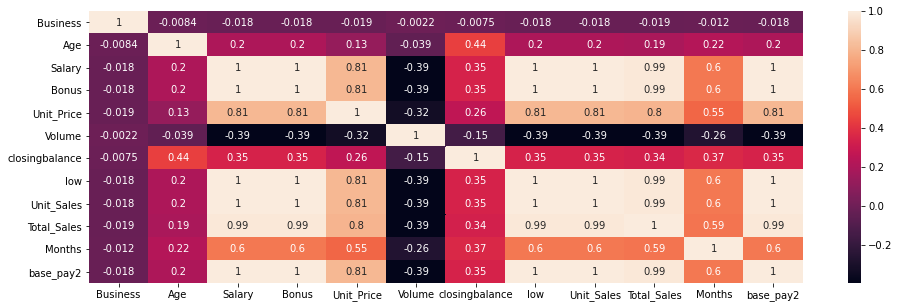

In [97]:
plt.figure(figsize = (16,5))
sns.heatmap(dp1.corr(method='spearman'),annot=True)

In [54]:
# from the above spearmans rank correlation we can conclude that base_pay2,salary,low,unit_Sales,Total_sales,Bonus are strongly correlated as the correlation scale shows 1
#

In [100]:
dp1.corr(method='spearman')

,Business,Age,Salary,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months,base_pay2
Business,1.000000,-0.008435,-0.018403,-0.018403,-0.019480,-0.002192,-0.007485,-0.018103,-0.018363,-0.019014,-0.012282,-0.018403
Age,-0.008435,1.000000,0.202282,0.202282,0.128266,-0.039345,0.440989,0.202040,0.202268,0.191818,0.222837,0.202282
Salary,-0.018403,0.202282,1.000000,1.000000,0.811713,-0.390488,0.346498,0.999859,0.999997,0.988213,0.603796,1.000000
Bonus,-0.018403,0.202282,1.000000,1.000000,0.811713,-0.390488,0.346498,0.999859,0.999997,0.988213,0.603796,1.000000
Unit_Price,-0.019480,0.128266,0.811713,0.811713,1.000000,-0.324230,0.263699,0.812412,0.811735,0.800220,0.550062,0.811713
Volume,-0.002192,-0.039345,-0.390488,-0.390488,-0.324230,1.000000,-0.147108,-0.392209,-0.390505,-0.390649,-0.262077,-0.390488
closingbalance,-0.007485,0.440989,0.346498,0.346498,0.263699,-0.147108,1.000000,0.346278,0.346485,0.336369,0.365927,0.346498
low,-0.018103,0.202040,0.999859,0.999859,0.812412,-0.392209,0.346278,1.000000,0.999856,0.988067,0.603752,0.999859
Unit_Sales,-0.018363,0.202268,0.999997,0.999997,0.811735,-0.390505,0.346485,0.999856,1.000000,0.988210,0.603779,0.999997
Total_Sales,-0.019014,0.191818,0.988213,0.988213,0.800220,-0.390649,0.336369,0.988067,0.988210,1.000000,0.593002,0.988213


In [99]:
stats.spearmanr(dp1['Salary'], dp1['Calls'])

SpearmanrResult(correlation=0.030908791352831366, pvalue=0.028848010423011716)

In [98]:
dp1.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months,Education,base_pay2
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,254.4500,3.77,21226600,3.76,3.65,18.25,18.80,0,High School or less,2035.600
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,284.9060,3.74,10462800,3.68,3.65,18.40,18.85,0,High School or less,2279.248
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,294.8325,3.89,18761000,4.29,3.72,18.70,18.90,0,High School or less,2358.660
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,306.2560,4.35,66130600,4.31,3.83,18.75,19.00,0,High School or less,2450.048
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,312.2500,4.34,26868200,4.41,4.08,18.80,19.05,1,High School or less,2498.000


# converting categorical variables to numerical using label encoder

In [103]:
from sklearn.preprocessing import LabelEncoder

In [105]:
le=LabelEncoder()

# coding categorical variable gender as numerical values.
#  Female =0,male =1
dp2=dp1.copy()
dp2['Gender_code']=le.fit_transform(dp2.Gender)


In [106]:
dp2

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months,Education,base_pay2,Gender_code
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,254.4500,3.770000,21226600,3.760000,3.650000,18.25,18.80,0,High School or less,2035.600,0
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,284.9060,3.740000,10462800,3.680000,3.650000,18.40,18.85,0,High School or less,2279.248,0
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,294.8325,3.890000,18761000,4.290000,3.720000,18.70,18.90,0,High School or less,2358.660,1
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,306.2560,4.350000,66130600,4.310000,3.830000,18.75,19.00,0,High School or less,2450.048,0
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,312.2500,4.340000,26868200,4.410000,4.080000,18.80,19.05,1,High School or less,2498.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,9034.8400,629.511067,3927000,293.838840,310.955001,117.80,0.00,72,PG,72278.720,0
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,9284.2950,627.841071,6031900,301.311314,309.610028,118.60,0.00,72,PG,74274.360,1
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,9631.8400,625.860033,7949400,306.040009,303.483494,118.60,0.00,72,PG,77054.720,1
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,9798.5350,629.510005,3908400,308.579987,312.432438,118.65,0.00,72,PG,78388.280,1


In [107]:
# converting dependences in to numerical
# no dependences=0, yes dependeences =1
dp2['Dependancies_code']=le.fit_transform(dp2.Dependancies)

In [108]:
#converting billing in to numerical
#no=0, yes=1
dp2['Billing_code']=le.fit_transform(dp2.Billing)

In [109]:
# converting calls  in to numerical 
#no=0, yes=1
dp2['Calls_code']=le.fit_transform(dp2.Calls)

In [110]:
#converting rating into numerical
# no=0,yes=1
dp2['Rating_code']=le.fit_transform(dp2.Rating)

In [111]:
#converting education into numerical 
#High School or less=1, 'Intermediate=2, 'Graduation=0, 'PG=3
dp2['Education_code']=le.fit_transform(dp2.Education)

In [112]:
#converting type into numerical
#Month-to-month = 0  ,Two year=2 ,One year=1 
dp2['Type_code']=le.fit_transform(dp2.Type)

In [113]:
dp2

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Bonus,...,Months,Education,base_pay2,Gender_code,Dependancies_code,Billing_code,Calls_code,Rating_code,Education_code,Type_code
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,254.4500,...,0,High School or less,2035.600,0,0,0,1,1,1,0
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,284.9060,...,0,High School or less,2279.248,0,0,0,1,1,1,0
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,294.8325,...,0,High School or less,2358.660,1,0,1,1,0,1,0
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,306.2560,...,0,High School or less,2450.048,0,0,1,1,1,1,0
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,312.2500,...,1,High School or less,2498.000,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,9034.8400,...,72,PG,72278.720,0,0,0,1,0,3,0
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,9284.2950,...,72,PG,74274.360,1,0,1,1,0,3,0
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,9631.8400,...,72,PG,77054.720,1,0,1,1,0,3,0
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,9798.5350,...,72,PG,78388.280,1,0,1,1,1,3,0


In [114]:
# creating a subset for all the numerical variables converted for categorical with a dependedent variable
dp2_categorical=dp2[['Salary','Gender_code','Dependancies_code','Billing_code','Calls_code','Rating_code','Education_code','Type_code']]

In [115]:
dp2_categorical

,Salary,Gender_code,Dependancies_code,Billing_code,Calls_code,Rating_code,Education_code,Type_code
0,5089.00,0,0,0,1,1,1,0
1,5698.12,0,0,0,1,1,1,0
2,5896.65,1,0,1,1,0,1,0
3,6125.12,0,0,1,1,1,1,0
4,6245.00,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...
4995,180696.80,0,0,0,1,0,3,0
4996,185685.90,1,0,1,1,0,3,0
4997,192636.80,1,0,1,1,0,3,0
4998,195970.70,1,0,1,1,1,3,0


In [116]:
dp2[['Education','Education_code']].value_counts()

Education            Education_code
PG                   3                 2979
Graduation           0                 1980
Intermediate         2                   27
High School or less  1                   14
dtype: int64

In [117]:
dp2[['Type','Type_code']].value_counts()

Type            Type_code
Month-to-month  0            2777
Two year        2            1195
One year        1            1028
dtype: int64

<AxesSubplot:>

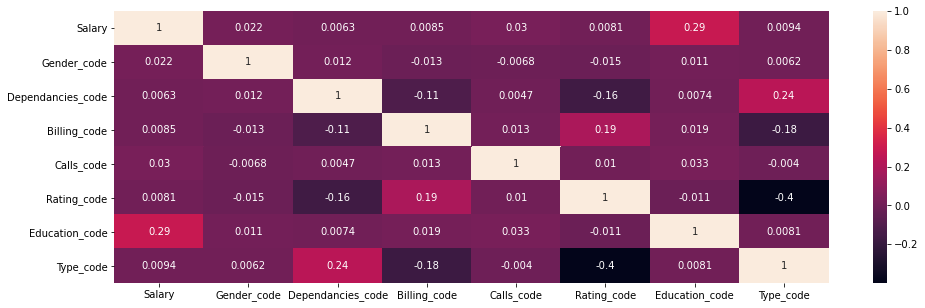

In [118]:
# correalation among categorical variables and dependent variables
plt.figure(figsize = (16,5))
sns.heatmap(dp2_categorical.corr(),annot=True)

In [72]:
#there is no correlation between any categorical variables and the depended variale

In [77]:
dp2.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Bonus', 'Unit_Price', 'Volume',
       'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months',
       'Education', 'base_pay2', 'Gender_code', 'Dependancies_code',
       'Billing_code', 'Calls_code', 'Rating_code', 'Education_code',
       'Type_code'],
      dtype='object')

In [119]:
# we can also  using PHi_k correlation library to check the correlation between categorical and numerical variables instead of label encoder.

In [120]:
# using Phi_k correlation 

interval columns not set, guessing: ['Business', 'Age', 'Salary', 'Bonus', 'Unit_Price', 'Volume', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months', 'base_pay2']


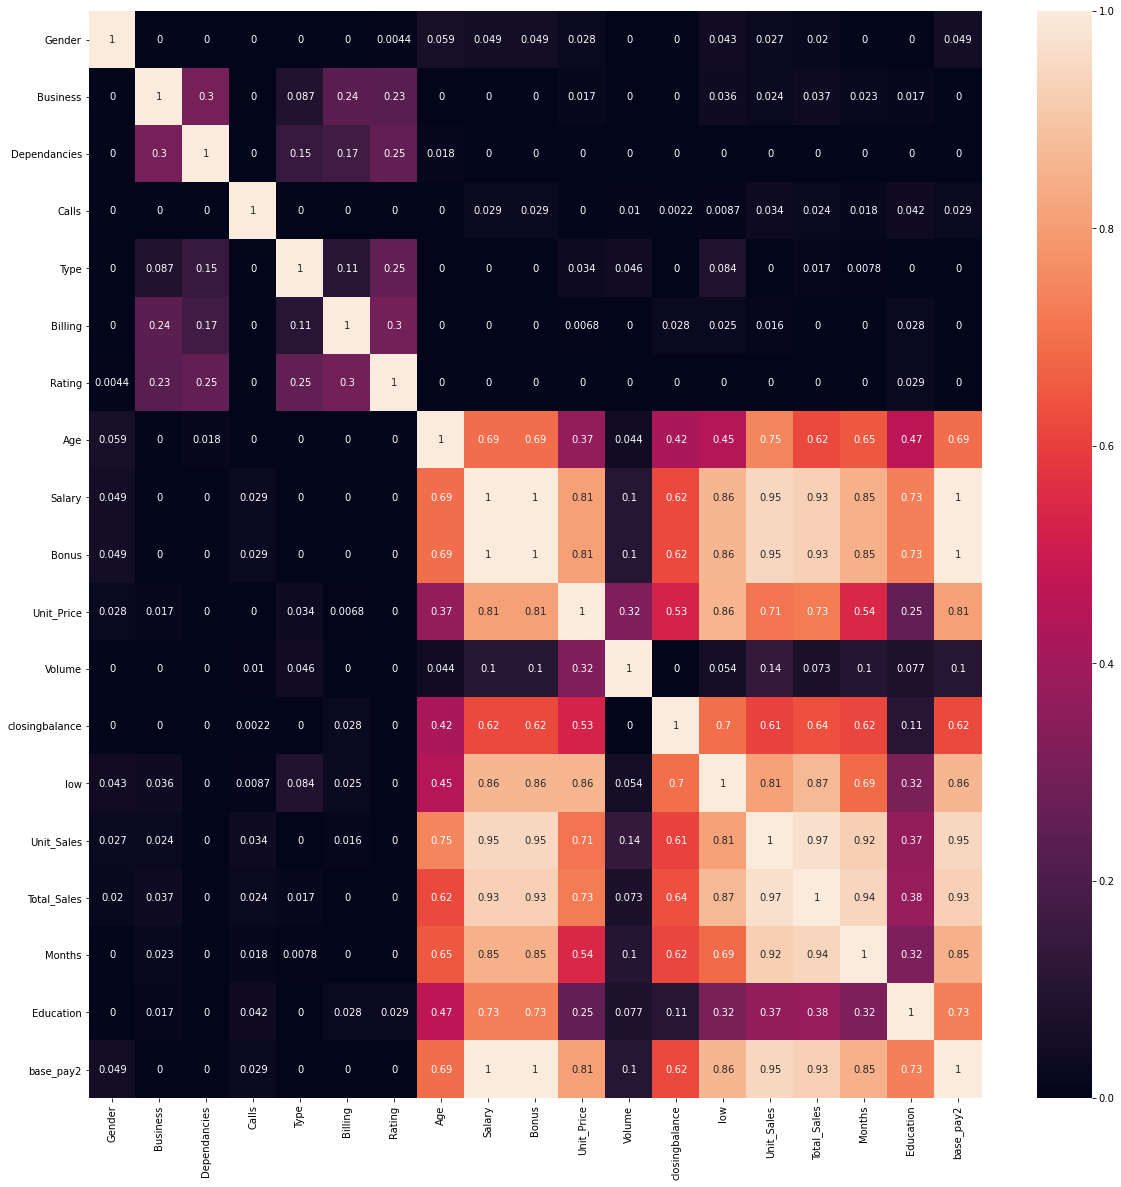

In [121]:
phik_corr= dp1.phik_matrix()
plt.figure(figsize=(20,20))
sns.heatmap(phik_corr, annot= True)
plt.show()

##### from the above heatmap as the dependent variable is salary we can see positive correlation with bonus, base_pay2,unit price,closing balance,low,unit sales,total sales,

###### bonus,base pay are perfect positive correlated to salary

##### unit price,closing balance,low,unit sales,total sales are highly positive correlation with salary

##### the variables gender,business,dependancies,calls,type of settlement,billing,rating has no correlation

In [ ]:
# finalizing the dataset 

In [372]:
df_final=dp2[['Salary', 'base_pay2', 'Bonus', 'Unit_Price', 'closingbalance','low', 'Unit_Sales', 'Total_Sales','Age','Education','Months']]

In [251]:
df_final

,Salary,base_pay2,Bonus,Unit_Price,closingbalance,low,Unit_Sales,Total_Sales,Age,Education,Months
0,5089.00,2035.600,254.4500,3.770000,3.760000,3.650000,18.25,18.80,18,High School or less,0
1,5698.12,2279.248,284.9060,3.740000,3.680000,3.650000,18.40,18.85,19,High School or less,0
2,5896.65,2358.660,294.8325,3.890000,4.290000,3.720000,18.70,18.90,22,High School or less,0
3,6125.12,2450.048,306.2560,4.350000,4.310000,3.830000,18.75,19.00,21,High School or less,0
4,6245.00,2498.000,312.2500,4.340000,4.410000,4.080000,18.80,19.05,23,High School or less,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,180696.80,72278.720,9034.8400,629.511067,293.838840,310.955001,117.80,0.00,72,PG,72
4996,185685.90,74274.360,9284.2950,627.841071,301.311314,309.610028,118.60,0.00,73,PG,72
4997,192636.80,77054.720,9631.8400,625.860033,306.040009,303.483494,118.60,0.00,74,PG,72
4998,195970.70,78388.280,9798.5350,629.510005,308.579987,312.432438,118.65,0.00,74,PG,72


# working on outliers

<AxesSubplot:>

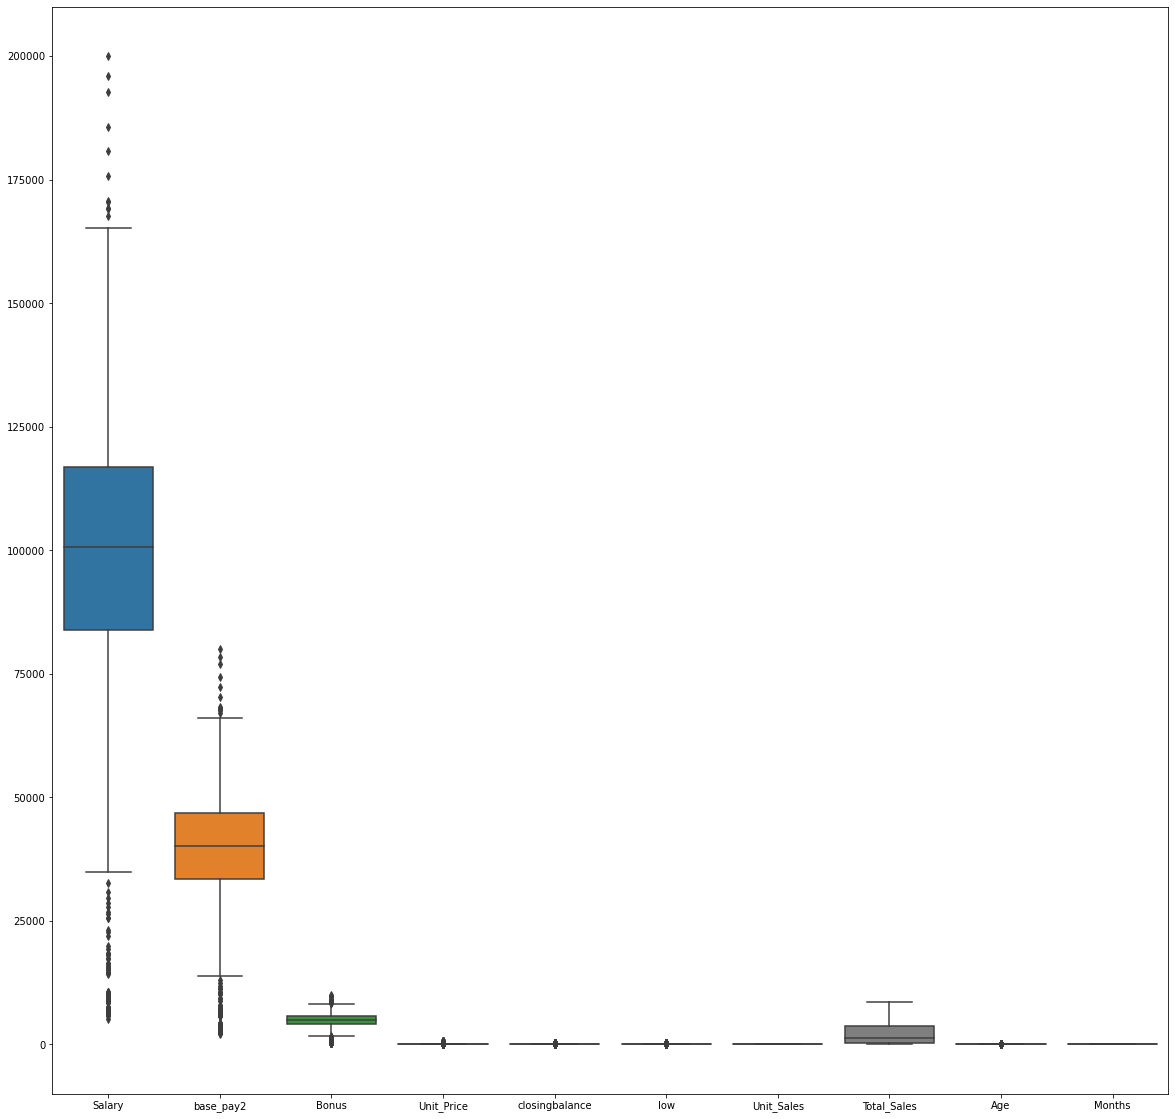

In [373]:
# ploting box plot for visual representation for outliers
plt.figure(figsize = (20,20))
sns.boxplot(data=df_final)

In [253]:
def low_upp(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR= Q3-Q1
    low_whis = Q1-(1.5 * IQR)
    up_whis = Q3+(1.5 * IQR)
    return low_whis,up_whis

<AxesSubplot:xlabel='Salary'>

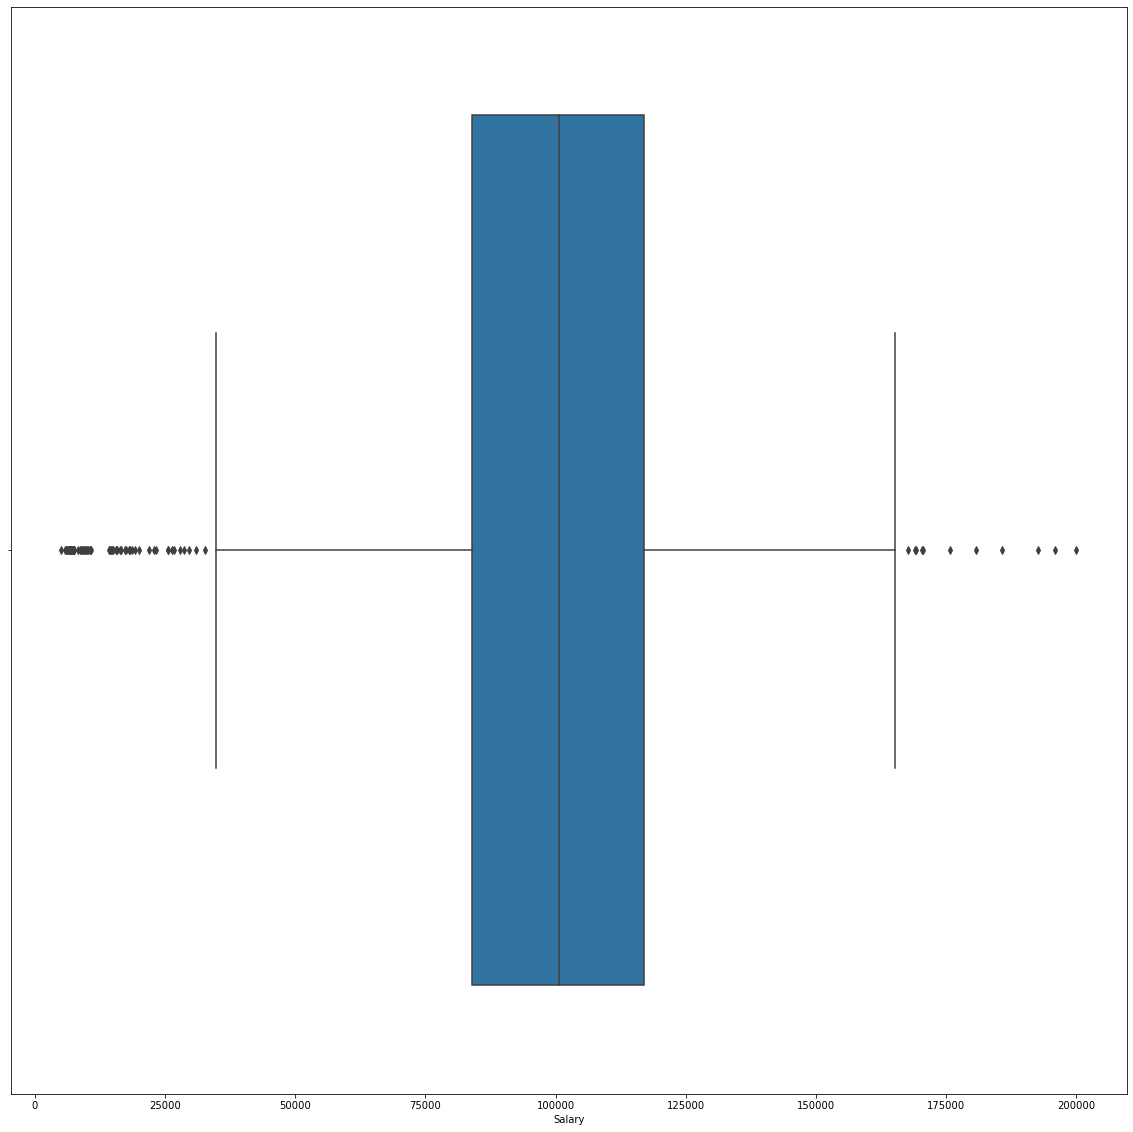

In [165]:
plt.figure(figsize = (20,20))
sns.boxplot(x='Salary',data=df_final)

In [166]:
lowsal, upsal= low_upp(df_final['Salary'])
df_final['Salary']= np.where(df_final['Salary']> upsal, upsal, df_final['Salary'])
df_final['Salary']= np.where(df_final['Salary']< lowsal, lowsal, df_final['Salary'])

<ipython-input-166-a8ade8957e3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Salary']= np.where(df_final['Salary']> upsal, upsal, df_final['Salary'])
<ipython-input-166-a8ade8957e3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Salary']= np.where(df_final['Salary']< lowsal, lowsal, df_final['Salary'])


<AxesSubplot:xlabel='Salary'>

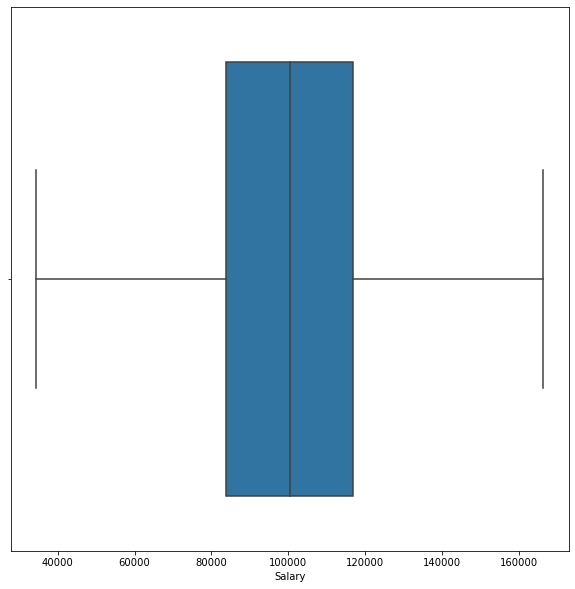

In [167]:
plt.figure(figsize = (10,10))
sns.boxplot(x='Salary',data=df_final)

In [183]:
# repalced outliers with upper and lower whiskers for the variables salary.

<AxesSubplot:xlabel='base_pay2'>

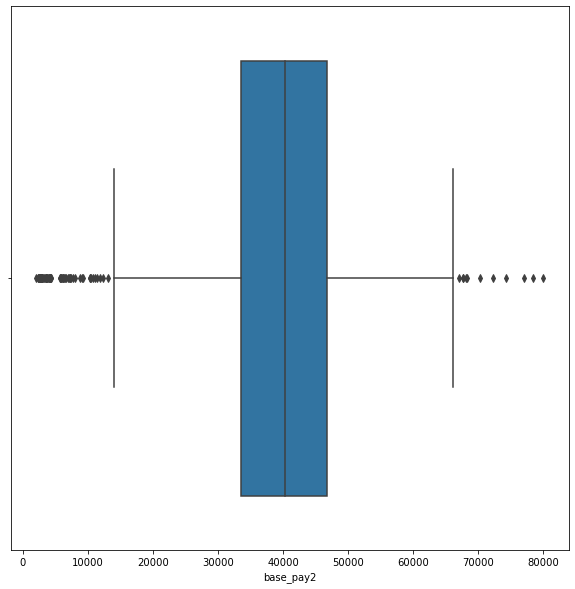

In [168]:
plt.figure(figsize = (10,10))
sns.boxplot(x='base_pay2',data=df_final)

In [169]:
lowsal, upsal= low_upp(df_final['base_pay2'])
df_final['base_pay2']= np.where(df_final['base_pay2']> upsal, upsal, df_final['base_pay2'])
df_final['base_pay2']= np.where(df_final['base_pay2']< lowsal, lowsal, df_final['base_pay2'])

<ipython-input-169-f6a1280e5e7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['base_pay2']= np.where(df_final['base_pay2']> upsal, upsal, df_final['base_pay2'])
<ipython-input-169-f6a1280e5e7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['base_pay2']= np.where(df_final['base_pay2']< lowsal, lowsal, df_final['base_pay2'])


<AxesSubplot:xlabel='base_pay2'>

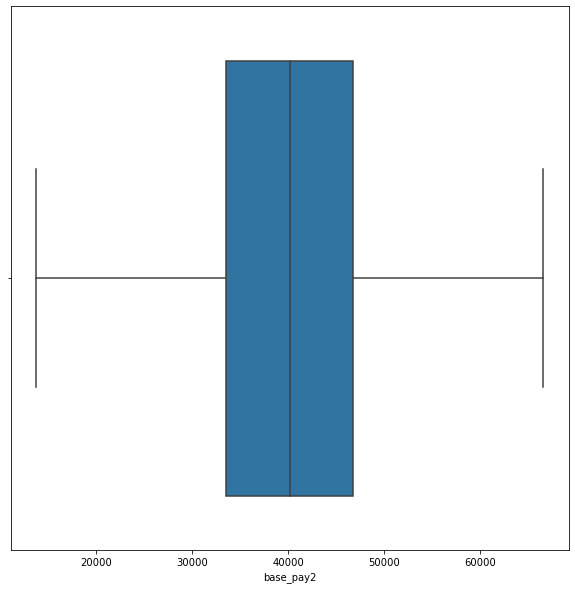

In [170]:
plt.figure(figsize = (10,10))
sns.boxplot(x='base_pay2',data=df_final)

In [184]:
# repalced outliers with upper and lower whiskers for the variable base_pay2.

<AxesSubplot:xlabel='Bonus'>

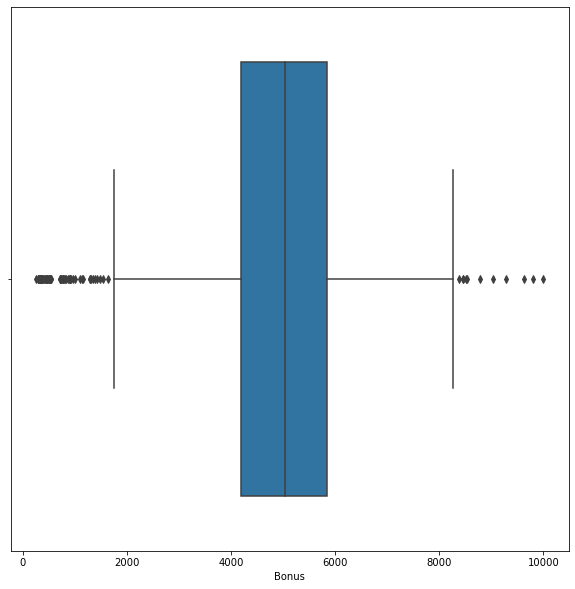

In [171]:
plt.figure(figsize = (10,10))
sns.boxplot(x='Bonus',data=df_final)

In [172]:
lowsal, upsal= low_upp(df_final['Bonus'])
df_final['Bonus']= np.where(df_final['Bonus']> upsal, upsal, df_final['Bonus'])
df_final['Bonus']= np.where(df_final['Bonus']< lowsal, lowsal, df_final['Bonus'])

<ipython-input-172-cff179affcf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Bonus']= np.where(df_final['Bonus']> upsal, upsal, df_final['Bonus'])
<ipython-input-172-cff179affcf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Bonus']= np.where(df_final['Bonus']< lowsal, lowsal, df_final['Bonus'])


<AxesSubplot:xlabel='Bonus'>

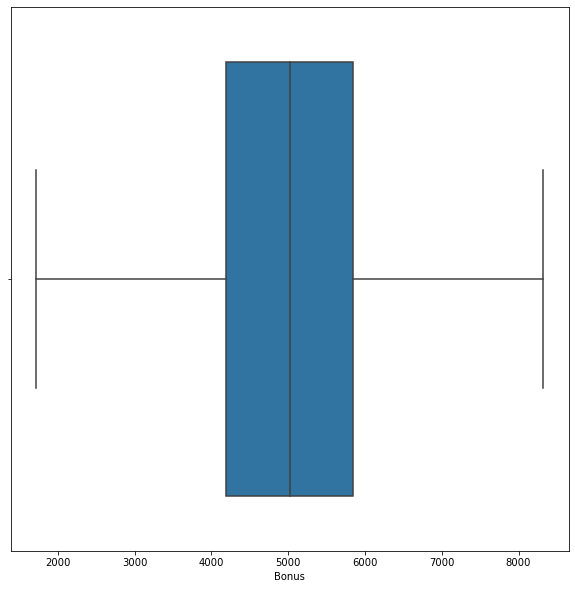

In [173]:
plt.figure(figsize = (10,10))
sns.boxplot(x='Bonus',data=df_final)

In [ ]:
# repalced outliers with upper and lower whiskers for the variable bonus.

<AxesSubplot:xlabel='Unit_Price'>

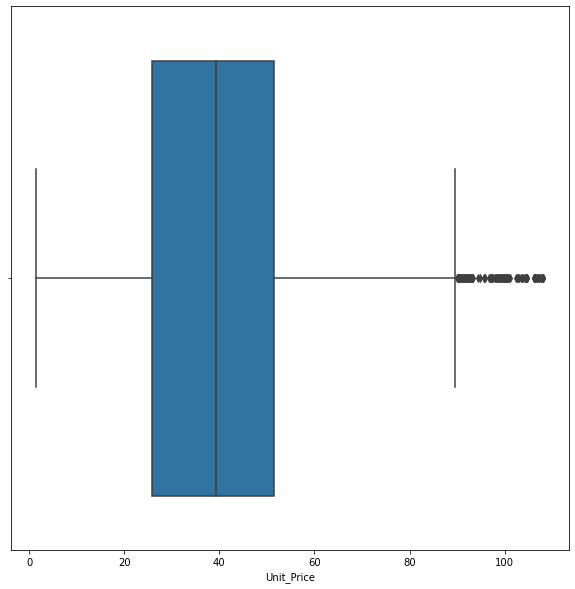

In [174]:
plt.figure(figsize = (10,10))
sns.boxplot(x='Unit_Price',data=df_final)

In [175]:
lowsal, upsal= low_upp(df_final['Unit_Price'])
df_final['Unit_Price']= np.where(df_final['Unit_Price']> upsal, upsal, df_final['Unit_Price'])
df_final['Unit_Price']= np.where(df_final['Unit_Price']< lowsal, lowsal, df_final['Unit_Price'])

<ipython-input-175-ef6ed109f3b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Unit_Price']= np.where(df_final['Unit_Price']> upsal, upsal, df_final['Unit_Price'])
<ipython-input-175-ef6ed109f3b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Unit_Price']= np.where(df_final['Unit_Price']< lowsal, lowsal, df_final['Unit_Price'])


<AxesSubplot:xlabel='Unit_Price'>

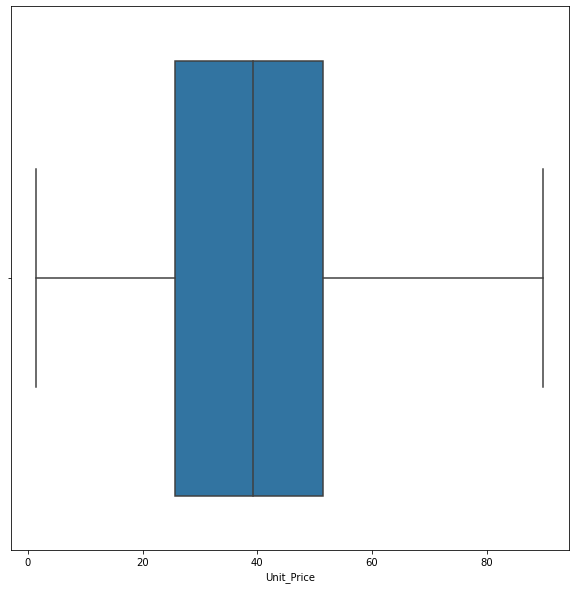

In [176]:
plt.figure(figsize = (10,10))
sns.boxplot(x='Unit_Price',data=df_final)

In [185]:
# repalced outliers with upper and lower whiskers for the variable for unit price

<AxesSubplot:xlabel='low'>

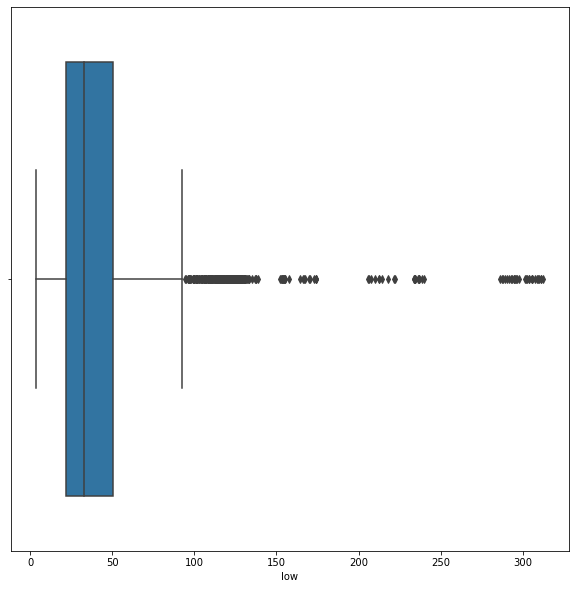

In [177]:
plt.figure(figsize = (10,10))
sns.boxplot(x='low',data=df_final)

In [178]:
lowsal, upsal= low_upp(df_final['low'])
df_final['low']= np.where(df_final['low']> upsal, upsal, df_final['low'])
df_final['low']= np.where(df_final['low']< lowsal, lowsal, df_final['low'])

<ipython-input-178-0a3d6f6edd79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['low']= np.where(df_final['low']> upsal, upsal, df_final['low'])
<ipython-input-178-0a3d6f6edd79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['low']= np.where(df_final['low']< lowsal, lowsal, df_final['low'])


<AxesSubplot:xlabel='low'>

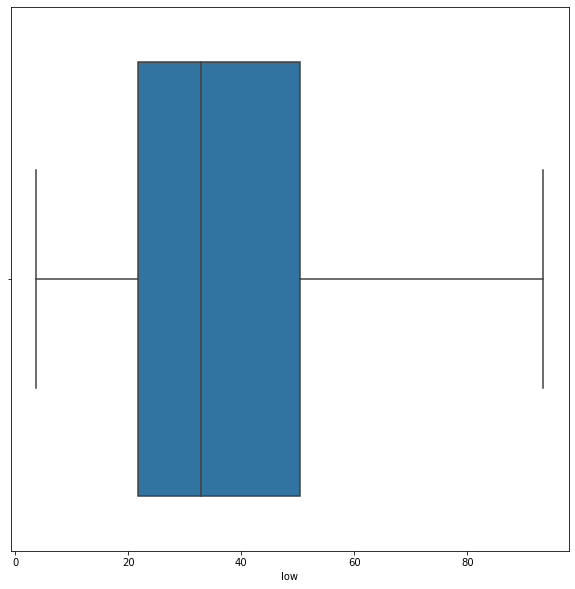

In [179]:
plt.figure(figsize = (10,10))
sns.boxplot(x='low',data=df_final)

In [ ]:
# repalced outliers with upper and lower whiskers for the variable for low.

<AxesSubplot:xlabel='Unit_Sales'>

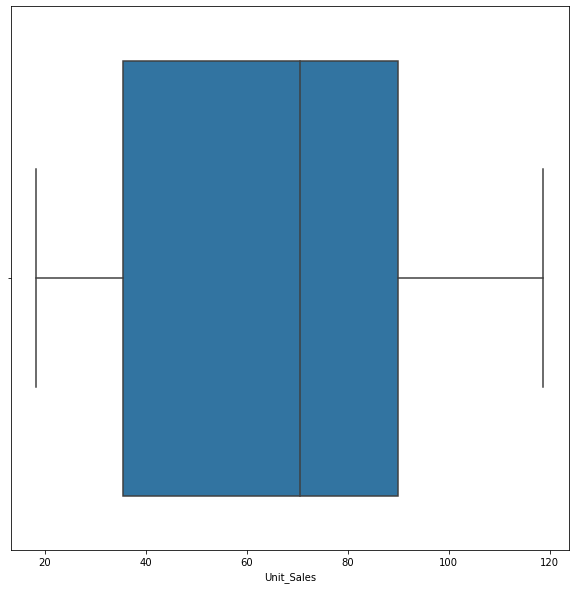

In [180]:
plt.figure(figsize = (10,10))
sns.boxplot(x='Unit_Sales',data=df_final)

In [ ]:
#  there are no outliers in unitsales.

<AxesSubplot:xlabel='Total_Sales'>

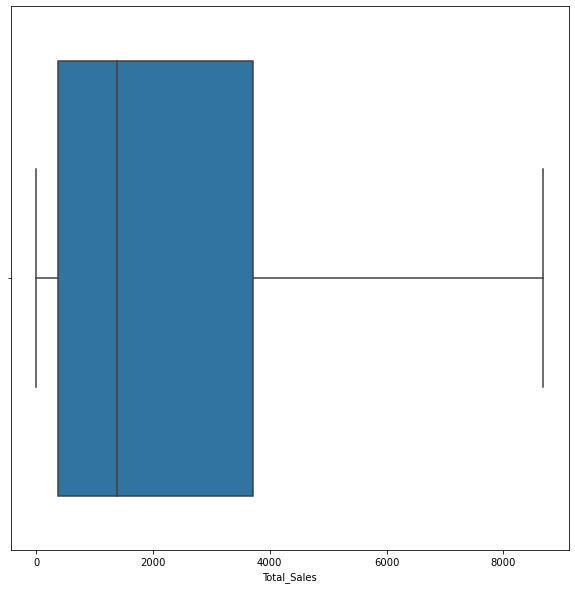

In [181]:
plt.figure(figsize = (10,10))
sns.boxplot(x='Total_Sales',data=df_final)

In [186]:
 # there are no outliers in Total_sales.

<AxesSubplot:xlabel='Age'>

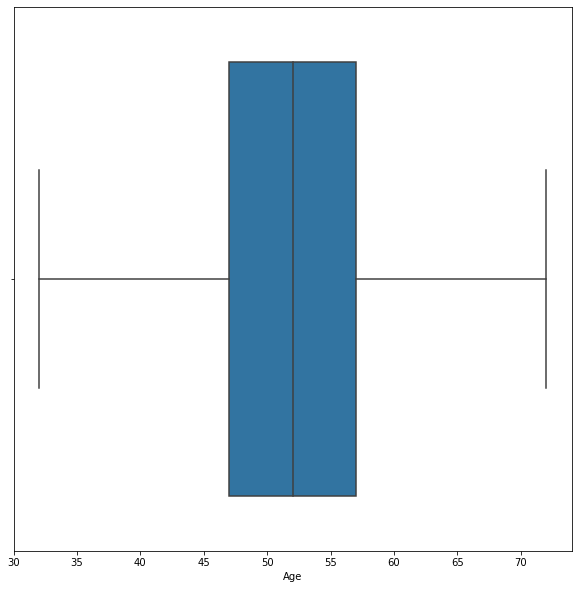

In [182]:
plt.figure(figsize = (10,10))
sns.boxplot(x='Age',data=df_final)

<AxesSubplot:xlabel='closingbalance'>

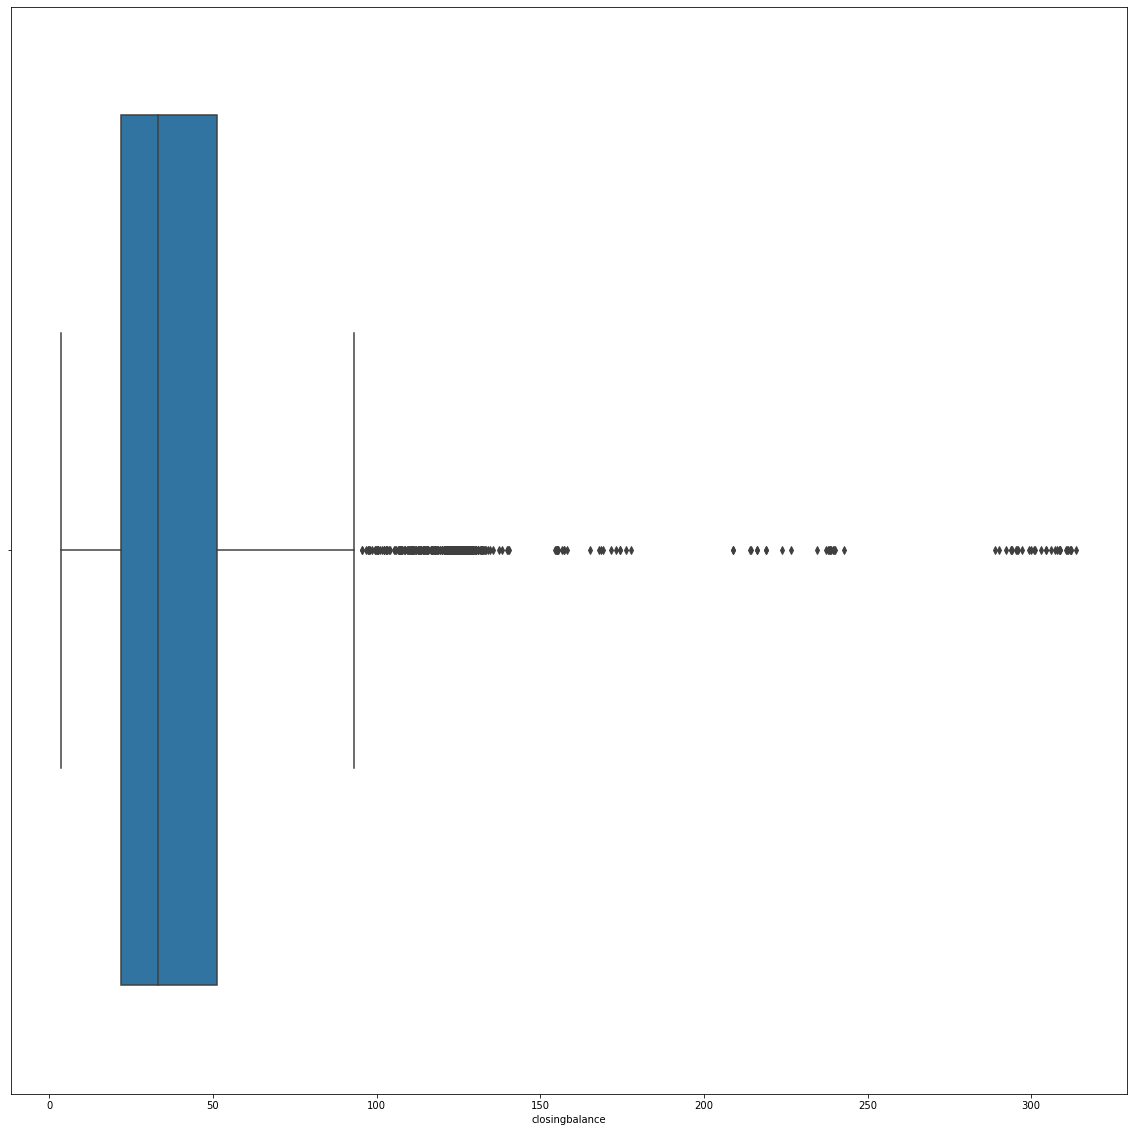

In [254]:
plt.figure(figsize = (20,20))
sns.boxplot(x='closingbalance',data=df_final)

In [255]:
lowsal, upsal= low_upp(df_final['closingbalance'])
df_final['closingbalance']= np.where(df_final['closingbalance']> upsal, upsal, df_final['closingbalance'])
df_final['closingbalance']= np.where(df_final['closingbalance']< lowsal, lowsal, df_final['closingbalance'])

<ipython-input-255-15cf48b3baf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['closingbalance']= np.where(df_final['closingbalance']> upsal, upsal, df_final['closingbalance'])
<ipython-input-255-15cf48b3baf0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['closingbalance']= np.where(df_final['closingbalance']< lowsal, lowsal, df_final['closingbalance'])


<AxesSubplot:xlabel='closingbalance'>

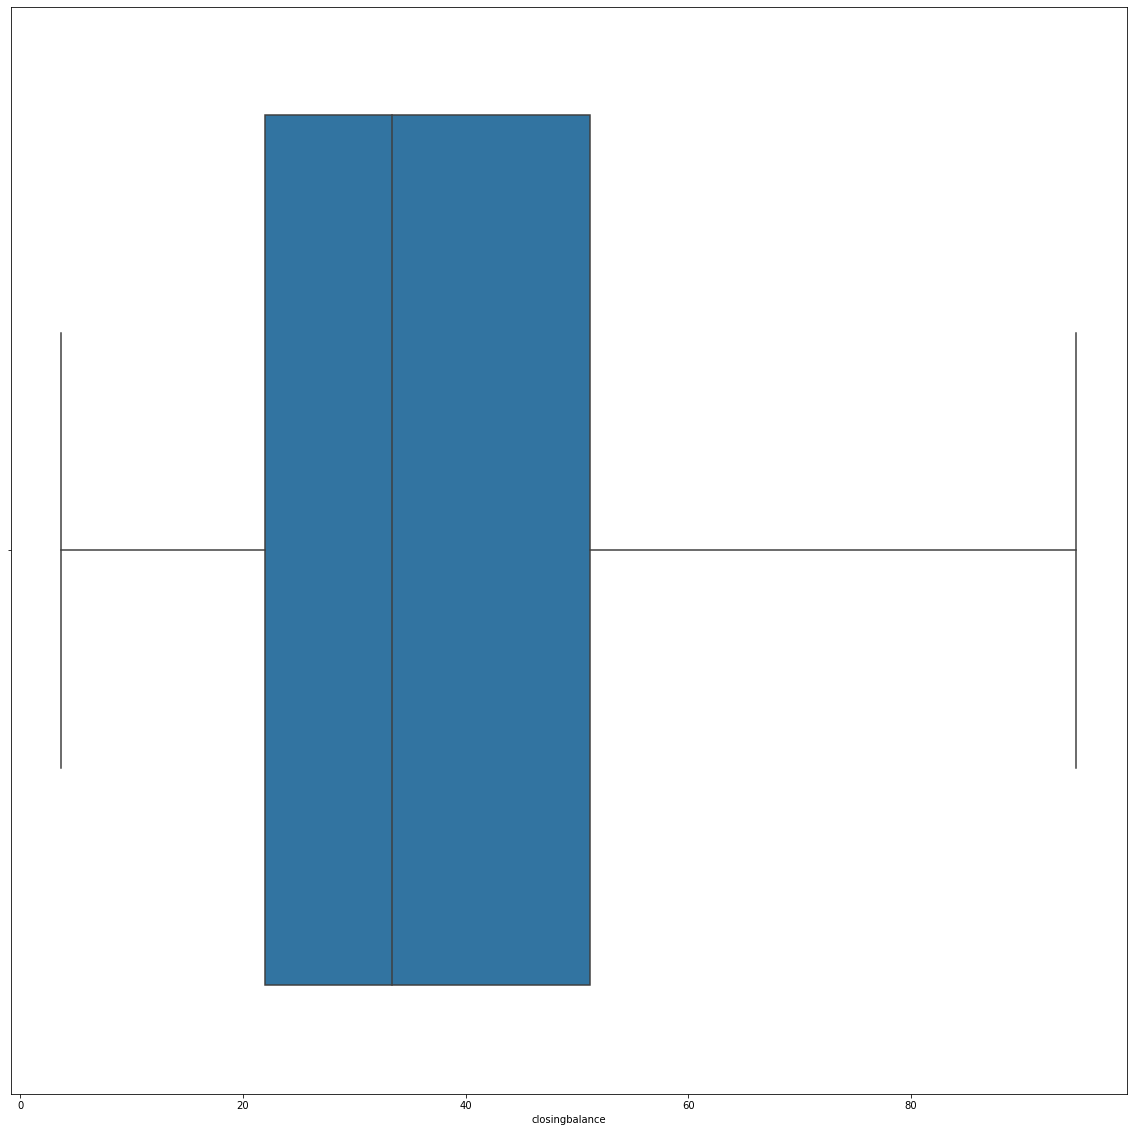

In [256]:
plt.figure(figsize = (20,20))
sns.boxplot(x='closingbalance',data=df_final)

In [187]:
# clear age column 

In [303]:
df_final.head()

,Salary,base_pay2,Bonus,Unit_Price,closingbalance,low,Unit_Sales,Total_Sales,Age,Education,Months
0,5089.00,2035.600,254.4500,3.77,3.76,3.65,18.25,18.80,18,High School or less,0
1,5698.12,2279.248,284.9060,3.74,3.68,3.65,18.40,18.85,19,High School or less,0
2,5896.65,2358.660,294.8325,3.89,4.29,3.72,18.70,18.90,22,High School or less,0
3,6125.12,2450.048,306.2560,4.35,4.31,3.83,18.75,19.00,21,High School or less,0
4,6245.00,2498.000,312.2500,4.34,4.41,4.08,18.80,19.05,23,High School or less,1


In [297]:
df_final.describe()

,Salary,base_pay2,Bonus,Unit_Price,closingbalance,low,Unit_Sales,Total_Sales,Age,Months
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000
mean,99821.928553,39928.771421,4991.096428,51.258522,39.835394,43.034129,64.84151,2265.102380,51.865000,32.18480
std,25376.961744,10150.784698,1268.848087,52.244022,24.086534,36.760641,30.13968,2267.720694,8.560691,24.63673
min,5089.000000,2035.600000,254.450000,1.440000,3.680000,3.650000,18.25000,0.000000,18.000000,0.00000
25%,83890.338980,33556.135592,4194.516950,25.727500,21.990000,21.718750,35.50000,378.262500,47.000000,8.00000
50%,100579.378500,40231.751400,5028.968925,39.205000,33.340000,32.880001,70.50000,1389.050000,52.000000,28.00000
75%,116912.092475,46764.836990,5845.604624,58.715000,51.117500,50.415000,89.95000,3722.337500,57.000000,55.00000
max,199970.740000,79988.296000,9998.537000,629.511067,94.808751,312.432438,118.75000,8684.800000,88.000000,72.00000


In [298]:
df_final.shape

(5000, 11)

In [194]:
# filling outliers for all the variables

In [193]:
# replaced all the outliers


In [195]:
# finding the relation between bonus and basepay

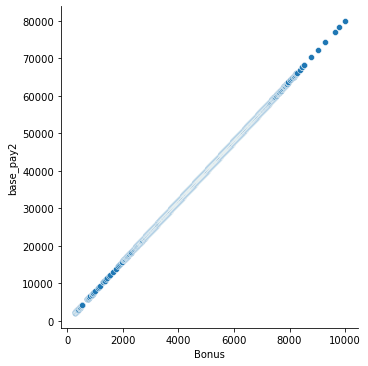

In [299]:
sns.relplot(x='Bonus', y='base_pay2', data= df_final)

###### its clear that the relation between bonus and base pay is linear correlation

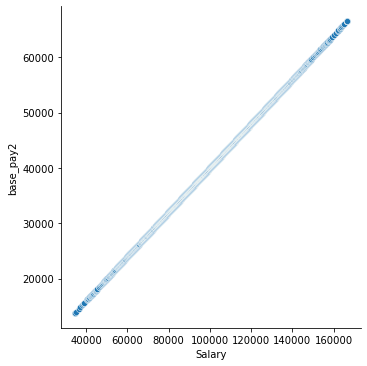

In [203]:
sns.relplot(x='Salary', y='base_pay2', data= df_final)

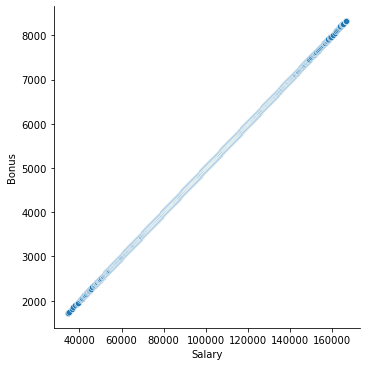

In [205]:
sns.relplot(x='Salary', y='Bonus', data= df_final)

In [300]:
df_f=df_final.copy()

##### its is clear from the above plots the relation between salary,bonus and basepay is linear

# Dependent variable is Salary

In [301]:
y=df_f['Salary']

# Independent variables

In [304]:
x=pd.DataFrame(np.c_[df_f['base_pay2'],df_f['Bonus'],df_f['Unit_Sales'],df_f['Total_Sales'],df_f['low'],df_f['Months'],df_f['Unit_Price'],df_f['Age'],df_f['Education']], columns= ['Base_pay','Bonus','Unit_Sales','Total_Sales','low','Months','Unit_Price','Age','Education'])
x.head()

,Base_pay,Bonus,Unit_Sales,Total_Sales,low,Months,Unit_Price,Age,Education
0,2035.6,254.45,18.25,18.8,3.65,0,3.77,18,High School or less
1,2279.248,284.906,18.4,18.85,3.65,0,3.74,19,High School or less
2,2358.66,294.8325,18.7,18.9,3.72,0,3.89,22,High School or less
3,2450.048,306.256,18.75,19.0,3.83,0,4.35,21,High School or less
4,2498.0,312.25,18.8,19.05,4.08,1,4.34,23,High School or less


# normalizing and scaling the data

In [305]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [234]:
# As the values from different variables are measured differently, let us scale the variables

In [306]:
x['Bonus'] = std_scale.fit_transform(x[['Bonus']])
x['Base_pay'] = std_scale.fit_transform(x[['Base_pay']])
x['Unit_Sales'] = std_scale.fit_transform(x[['Unit_Sales']])
x['Total_Sales'] = std_scale.fit_transform(x[['Total_Sales']])
x['low'] = std_scale.fit_transform(x[['low']])
x['Months'] = std_scale.fit_transform(x[['Months']])
x['Unit_Price'] = std_scale.fit_transform(x[['Unit_Price']])
x['Age'] = std_scale.fit_transform(x[['Age']])


In [307]:
x.head()

,Base_pay,Bonus,Unit_Sales,Total_Sales,low,Months,Unit_Price,Age,Education
0,-3.733402,-3.733402,-1.546007,-0.990654,-1.071474,-1.306505,-0.909066,-3.956268,High School or less
1,-3.709397,-3.709397,-1.541030,-0.990632,-1.071474,-1.306505,-0.909640,-3.839443,High School or less
2,-3.701573,-3.701573,-1.531075,-0.990610,-1.069570,-1.306505,-0.906769,-3.488969,High School or less
3,-3.692569,-3.692569,-1.529416,-0.990566,-1.066577,-1.306505,-0.897963,-3.605794,High School or less
4,-3.687844,-3.687844,-1.527757,-0.990544,-1.059775,-1.265911,-0.898155,-3.372144,High School or less


In [236]:
# As the education column is categorial lets encode them to numerical using dummies function

In [308]:
educate=pd.get_dummies(data=x['Education'],drop_first=True)
educate

,High School or less,Intermediate,PG
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4995,0,0,1
4996,0,0,1
4997,0,0,1
4998,0,0,1


In [309]:
x= pd.concat([x,educate],axis=1)
x.drop('Education', axis= 1, inplace= True)

In [343]:
x.head()

,Base_pay,Bonus,Unit_Sales,Total_Sales,low,Months,Unit_Price,Age,High School or less,Intermediate,PG
0,-3.733402,-3.733402,-1.546007,-0.990654,-1.071474,-1.306505,-0.909066,-3.956268,1,0,0
1,-3.709397,-3.709397,-1.541030,-0.990632,-1.071474,-1.306505,-0.909640,-3.839443,1,0,0
2,-3.701573,-3.701573,-1.531075,-0.990610,-1.069570,-1.306505,-0.906769,-3.488969,1,0,0
3,-3.692569,-3.692569,-1.529416,-0.990566,-1.066577,-1.306505,-0.897963,-3.605794,1,0,0
4,-3.687844,-3.687844,-1.527757,-0.990544,-1.059775,-1.265911,-0.898155,-3.372144,1,0,0


# Spliting the data for train and test

In [338]:
from sklearn.model_selection import train_test_split

# Spliting the data into train and test with 80% data in train, 20% in test and Random state as 5.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

##### As the data is labeled and the following regression, we can train and test suppervised regression models

In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [350]:
# As we are dealing with regression and the relation between many variables are linear

In [352]:
# Evaluating model for testing 

In [349]:
y_train_predict = lin_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
RMSE is 5.089559086554738e-11
R2 score is 1.0


In [353]:
# Evaluating model for testing 

In [341]:
y_train_predict = lin_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.089559086554738e-11
R2 score is 1.0


In [290]:
X1 = pd.DataFrame(np.c_[x['Base_pay'],x['Unit_Sales'],x['low'],x['Months'],x['Unit_Price'],x['Age'],x['High School or less'],x['Intermediate'],X['PG']], columns= ['Base_pay','Unit_Sales','low','Months','Unit_Price','Age','High School or less','Intermediate','PG'])
X1.head()

,Base_pay,Unit_Sales,low,Months,Unit_Price,Age,High School or less,Intermediate,PG
0,-3.733402,-1.546007,-1.071474,-1.306505,-0.909066,-3.956268,1.0,0.0,0.0
1,-3.709397,-1.541030,-1.071474,-1.306505,-0.909640,-3.839443,1.0,0.0,0.0
2,-3.701573,-1.531075,-1.069570,-1.306505,-0.906769,-3.488969,1.0,0.0,0.0
3,-3.692569,-1.529416,-1.066577,-1.306505,-0.897963,-3.605794,1.0,0.0,0.0
4,-3.687844,-1.527757,-1.059775,-1.265911,-0.898155,-3.372144,1.0,0.0,0.0


In [317]:
# Split the data into train and test with 80% data in train and Random state as 5.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state=5)

In [318]:
# Fit the model to the training data

lin_reg.fit(X1_train, y1_train)

LinearRegression()

In [319]:
# Evaluate the model for the training set

y1_train_predict = lin_reg.predict(X1_train)
rmse = (np.sqrt(mean_squared_error(y1_train, y1_train_predict)))
r2 = r2_score(y1_train, y1_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.190402951655126e-11
R2 score is 1.0


In [320]:
# Evaluate the model for the testing set

y1_test_predict = lin_reg.predict(X1_test)
rmse = (np.sqrt(mean_squared_error(y1_test, y1_test_predict)))
r2 = r2_score(y1_test, y1_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.1181865864005405e-11
R2 score is 1.0


In [354]:
# by removing the two features, we can see dip in rmse

# Lets also run other models, for alternative approch 

# Using Decision Tree Regression

In [358]:
# Import the Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [359]:
# Check the score of training and testing

print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))

0.9637047833891149
0.9574667337355544


In [370]:
# Increase the max_depth from 3 to 7 and check

DTR1 = DecisionTreeRegressor(max_depth=7)
DTR1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [371]:
# Check the score of training and testing

print(DTR1.score(X_train,y_train))
print(DTR1.score(X_test,y_test))

0.9998494398012558
0.9991485894971159


# Using random Forest Regression

In [409]:
# Import the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=3)
RF.fit(X_train,y_train.ravel())

RandomForestRegressor(n_estimators=3)

In [410]:
# Check the score of training and testing

print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

0.9999572535108369
0.9998293845043993


##### When compared to other model scores Random Forest Regressor with estimator n =3 has the near perfect RF score for training and testing 